Рассчитаем вероятности дефолта (PD) и выживания (S) эмитента облигаций к определённому моменту времени:
$$ PD(T) = \dfrac{1 - \dfrac{(1 + r_{Germany})^{T}}{(1 + r_{Greece})^{T}}}{1 - R}, \hspace{0.2cm} S(T) = 1 - PD(T)$$


In [107]:
import numpy as np
import matplotlib.pyplot as plt

#yield curves in EURO from world government bond; rates corresponds to the SAME tenors  
tenor_years = np.array([0.0, 0.25, 0.50, 5.00, 10.0, 15.0, 20.0, 25.0])
Germany_curve = np.array([0.0, -0.641, -0.644, -0.677, -0.346, -0.048, -0.040, 0.121])*0.01
Greece_curve = np.array([0.0, -0.205, -0.165, 0.217, 0.867, 1.183, 1.318, 1.493])*0.01
print(len(Germany_curve) ==  len(tenor_years) and  len(tenor_years) == len(Greece_curve))

Recovery_Rate = 0.0
PD, S = [0] * len(tenor_years), [1] * len(tenor_years)

print('tenor in years | survival probability')
for i in range(len(tenor_years)): 
    PD[i] = (1.0 - (pow((1.0 + Germany_curve[i]), tenor_years[i]))/(pow((1.0 + Greece_curve[i]), tenor_years[i])))/(1.0 - Recovery_Rate)
    S[i] = 1.0 - PD[i]
    print(tenor_years[i],  '   |  ', round(S[i], 3))


quarters_of_year = np.linspace(0.0, 25.0, num=100) #interpolating 0 to 25 years with 100 points - 1/4 year each
S_interpolated = np.interp(quarters_of_year, tenor_years, S) #linear interpolation 

print(' \n Linearly interpolated survival rates (100 times = 25years * 4 times per year):')
for i in range(len(quarters_of_year)):
    print(i, '|', round(quarters_of_year[i], 2),  ' |', round(S_interpolated[i], 6))

True
tenor in years | survival probability
0.0    |   1.0
0.25    |   0.999
0.5    |   0.998
5.0    |   0.956
10.0    |   0.886
15.0    |   0.832
20.0    |   0.763
25.0    |   0.712
 
 Linearly interpolated survival rates (100 times = 25years * 4 times per year):
0 | 0.0  | 1.0
1 | 0.25  | 0.998893
2 | 0.51  | 0.997552
3 | 0.76  | 0.995228
4 | 1.01  | 0.992904
5 | 1.26  | 0.99058
6 | 1.52  | 0.988256
7 | 1.77  | 0.985932
8 | 2.02  | 0.983608
9 | 2.27  | 0.981284
10 | 2.53  | 0.97896
11 | 2.78  | 0.976636
12 | 3.03  | 0.974312
13 | 3.28  | 0.971988
14 | 3.54  | 0.969664
15 | 3.79  | 0.96734
16 | 4.04  | 0.965016
17 | 4.29  | 0.962693
18 | 4.55  | 0.960369
19 | 4.8  | 0.958045
20 | 5.05  | 0.955477
21 | 5.3  | 0.951935
22 | 5.56  | 0.948392
23 | 5.81  | 0.94485
24 | 6.06  | 0.941307
25 | 6.31  | 0.937765
26 | 6.57  | 0.934223
27 | 6.82  | 0.93068
28 | 7.07  | 0.927138
29 | 7.32  | 0.923595
30 | 7.58  | 0.920053
31 | 7.83  | 0.916511
32 | 8.08  | 0.912968
33 | 8.33  | 0.909426
34 | 8.59  

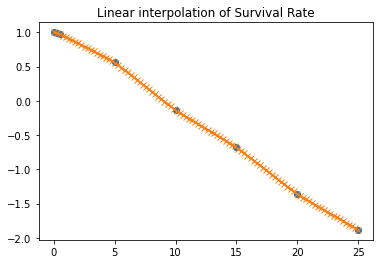

In [105]:
fig, ax = plt.subplots()
ax.plot(tenor_years, S, marker = 'o')
ax.plot(quarters_of_year, S_interpolated, marker = 'x')
ax.set_title('Linear interpolation of Survival Rate')
plt.show() 

Высчитаем стоимость купона в кредитном дефолтном свопе для покупателя: 
$$ \dfrac{x}{100} \sum_{i = 1}^{100} S_{interp}(T_{i}) = (1 - R)(1 - S_{interp}(100))$$

In [106]:
payment_buyer = 100 * (1 - Recovery_Rate) *(1 - S_interpolated[99]) / sum(S_interpolated)
print('Мат. ожидания выплат покупателя и продавца равны при: ' + str(round(payment_buyer, 6)) + '% годовых')
print('\nТаблица для покупателя:')
print('Номер платежа|Cумма (доля от номинала)|Вероятность выплаты') 
for i in range(len(quarters_of_year)):
    print(i, '           |', round(payment_buyer/100.0,6), '  |', round(S_interpolated[i], 3))

Мат. ожидания выплат покупателя и продавца равны при: -0.702051% годовых

Таблица для покупателя:
Номер платежа|Cумма (доля от номинала)|Вероятность выплаты
0            | -0.007021   | 1.0
1            | -0.007021   | 0.989
2            | -0.007021   | 0.976
3            | -0.007021   | 0.952
4            | -0.007021   | 0.929
5            | -0.007021   | 0.906
6            | -0.007021   | 0.883
7            | -0.007021   | 0.859
8            | -0.007021   | 0.836
9            | -0.007021   | 0.813
10            | -0.007021   | 0.79
11            | -0.007021   | 0.766
12            | -0.007021   | 0.743
13            | -0.007021   | 0.72
14            | -0.007021   | 0.697
15            | -0.007021   | 0.673
16            | -0.007021   | 0.65
17            | -0.007021   | 0.627
18            | -0.007021   | 0.604
19            | -0.007021   | 0.58
20            | -0.007021   | 0.555
21            | -0.007021   | 0.519
22            | -0.007021   | 0.484
23            | -0.007021   | 0

In [88]:
print('\nТаблица для продавца:')
print('Номер платежа|Cумма (доля от номинала)|Вероятность выплаты') 
payment_seller = 1.0 - Recovery_Rate
for i in range(1, len(quarters_of_year)):
    print(i, '           |', payment_seller, '                   |', round(S_interpolated[i-1] - S_interpolated[i], 6))


Таблица для продавца:
Номер платежа|Cумма (доля от номинала)|Вероятность выплаты
1            | 0.6                    | 0.001845
2            | 0.6                    | 0.002235
3            | 0.6                    | 0.003873
4            | 0.6                    | 0.003873
5            | 0.6                    | 0.003873
6            | 0.6                    | 0.003873
7            | 0.6                    | 0.003873
8            | 0.6                    | 0.003873
9            | 0.6                    | 0.003873
10            | 0.6                    | 0.003873
11            | 0.6                    | 0.003873
12            | 0.6                    | 0.003873
13            | 0.6                    | 0.003873
14            | 0.6                    | 0.003873
15            | 0.6                    | 0.003873
16            | 0.6                    | 0.003873
17            | 0.6                    | 0.003873
18            | 0.6                    | 0.003873
19            | 0.6        